In [2]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [3]:
def preprocess(detections):
  n = len(detections)
  print(f"Size = {n}, Max = {np.max(detections)}, Min = {np.min(detections)}, Mean = {np.mean(detections): 10.8f}, STD = {np.std(detections): 10.8f}, D = {np.mean(detections) + 3*np.std(detections): 10.8f}")

  index = np.zeros(n)
  results = np.zeros(n)

  for i, result in enumerate(detections):
    index[i] = i + 1
    results[i] = result

  index /= n
  results *= 10000

  return index, results

In [11]:
def plot_cdf_adversarial_audio(all_original_detections, adversarial_detections, attack_name):
  original_index, original_results = preprocess(all_original_detections)
  plt.plot(original_results, original_index, "k--", label="All Audio")

  i = 0
  colors = ["red", "blue", "green", "black", "yellow", "lime", "pink", "gold", "olive", "skyblue", "thistle"]
  for x in adversarial_detections:
    temp_index, temp_results = preprocess(adversarial_detections[x])
    plt.plot(temp_results, temp_index, colors[i], label=f"{x}")
    i = (i + 1) % len(colors)

  # adversarial_index, adversarial_results = preprocess(adversarial_detections)

  # plt.plot(adversarial_results, adversarial_index, "r-", label=f"{attack_name}")

  plt.xlabel(r'Energy in high frequencies (i.e., $E$) $\mathrm{x 10^{4}}$', fontsize=12)
  plt.ylabel('CDF', fontsize=12)
  plt.title(attack_name)
  plt.tick_params(axis='both', labelsize=12)
  plt.legend()
  plt.tight_layout()
  plt.show()



In [7]:
# Original Audios
original_files = os.listdir("original")

original_data = {}
combined_data = []
for x in original_files:
  with open(f"original/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    original_data[x.split(".pickle")[0]] = temp
    combined_data.extend(temp)

combined_data.sort()


Size = 100, Max = 0.0002627831418067217, Min = 0.0, Mean =  0.00002505, STD =  0.00004500, D =  0.00016006
Size = 1000, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00010320, STD =  0.00025536, D =  0.00086927
Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 2100, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00005960, STD =  0.00018325, D =  0.00060935


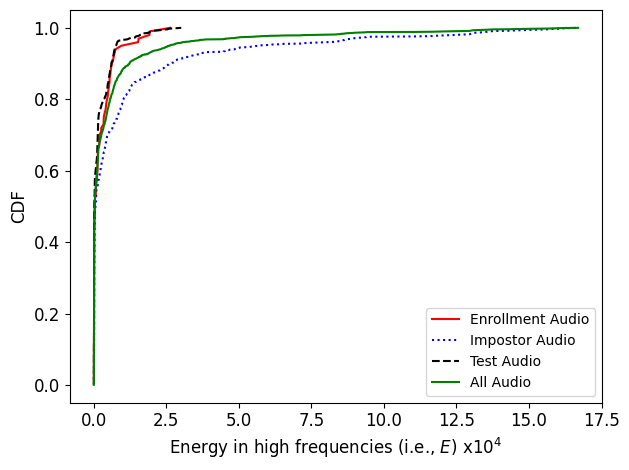

In [ ]:
# Plot CDF of original data
enroll_index, enroll_results = preprocess(original_data['spk10enroll'])
impostor_index, impostor_results = preprocess(original_data['spk10impostor'])
test_index, test_results = preprocess(original_data['spk10test'])
all_index, all_results = preprocess(combined_data)

plt.plot(enroll_results, enroll_index, "r-", label="Enrollment Audio")
plt.plot(impostor_results, impostor_index, "b:", label="Impostor Audio")
plt.plot(test_results, test_index, "k--", label="Test Audio")
plt.plot(all_results, all_index, "g", label="All Audio")

plt.xlabel(r"Energy in high frequencies (i.e., $E$) $\mathrm{x 10^{4}}$", fontsize=12)
plt.ylabel("CDF", fontsize=12)
plt.tick_params(axis="both", labelsize=12)
plt.legend()
plt.tight_layout()
plt.show()

Size = 2100, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00005960, STD =  0.00018325, D =  0.00060935
Size = 1000, Max = 0.0009882887825369835, Min = 2.1808716610394185e-07, Mean =  0.00005208, STD =  0.00007591, D =  0.00027980
Size = 1000, Max = 0.00031944733927957714, Min = 1.3993427216973942e-07, Mean =  0.00002828, STD =  0.00004101, D =  0.00015130
Size = 1000, Max = 0.0005136163672432303, Min = 2.359863202627821e-07, Mean =  0.00003006, STD =  0.00004424, D =  0.00016277
Size = 1000, Max = 0.0005894976784475148, Min = 2.237924832115823e-07, Mean =  0.00003672, STD =  0.00005290, D =  0.00019541
Size = 1000, Max = 0.0003099789028055966, Min = 1.4205781440068677e-07, Mean =  0.00002675, STD =  0.00003876, D =  0.00014302
Size = 1000, Max = 0.013425203040242195, Min = 7.670248123758938e-06, Mean =  0.00146193, STD =  0.00149537, D =  0.00594804
Size = 1000, Max = 0.0022086910903453827, Min = 6.520471629301028e-07, Mean =  0.00011531, STD =  0.00016535, D =  0.00061134


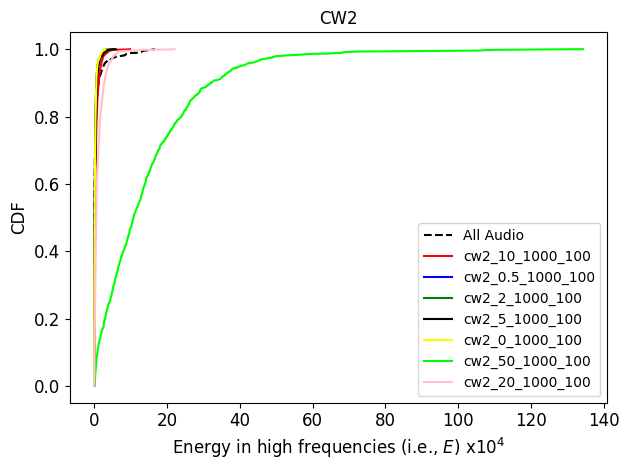

In [ ]:
# CW2 Attack
cw2_files = os.listdir("cw2")
cw2_data = {}
for x in cw2_files:
  with open(f"cw2/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    cw2_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(combined_data, cw2_data, "CW2")

Size = 2100, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00005960, STD =  0.00018325, D =  0.00060935
Size = 1000, Max = 0.0020918743684887886, Min = 0.00022874436399433762, Mean =  0.00071547, STD =  0.00020623, D =  0.00133417
Size = 1000, Max = 0.0024154731072485447, Min = 0.00039327898412011564, Mean =  0.00110732, STD =  0.00028130, D =  0.00195121
Size = 1000, Max = 0.0025493428111076355, Min = 0.000393372232792899, Mean =  0.00102965, STD =  0.00028024, D =  0.00187038


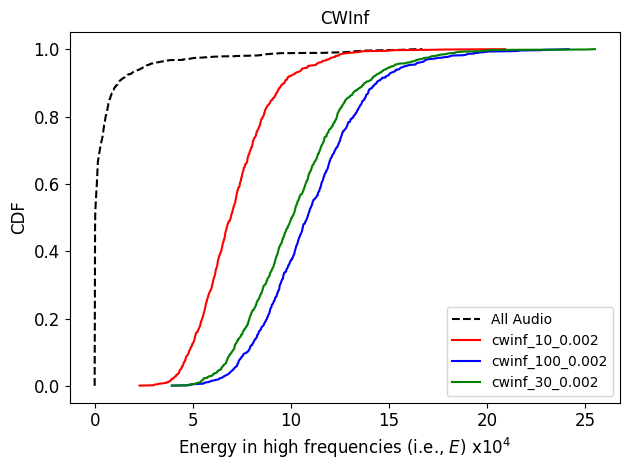

In [ ]:
# CWInf
cwinf_files = os.listdir("cwinf")
cwinf_data = {}
for x in cwinf_files:
  with open(f"cwinf/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    cwinf_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(combined_data, cwinf_data, "CWInf")

Size = 2100, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00005960, STD =  0.00018325, D =  0.00060935
Size = 1000, Max = 0.004951938986778259, Min = 0.0001364090567221865, Mean =  0.00269106, STD =  0.00090133, D =  0.00539506


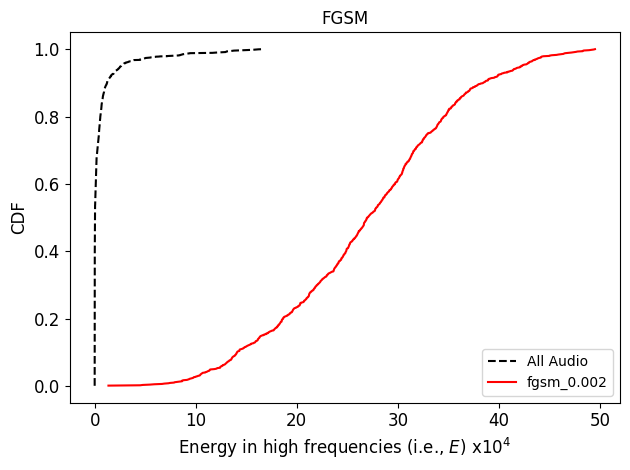

In [ ]:
# FGSM
fgsm_files = os.listdir("fgsm")
fgsm_data = {}
for x in fgsm_files:
  with open(f"fgsm/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    fgsm_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(combined_data, fgsm_data, "FGSM")

Size = 2100, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00005960, STD =  0.00018325, D =  0.00060935
Size = 1000, Max = 0.0028154447209089994, Min = 0.0004703507584054023, Mean =  0.00106398, STD =  0.00028595, D =  0.00192182
Size = 1000, Max = 0.002615693723782897, Min = 0.0003731626202352345, Mean =  0.00116022, STD =  0.00032400, D =  0.00213221
Size = 1000, Max = 0.00304584507830441, Min = 0.0004571381432469934, Mean =  0.00110062, STD =  0.00029767, D =  0.00199363
Size = 1000, Max = 0.0033040863927453756, Min = 0.0003546853258740157, Mean =  0.00120341, STD =  0.00033413, D =  0.00220579
Size = 1000, Max = 0.002968353684991598, Min = 0.000419503339799121, Mean =  0.00125347, STD =  0.00034787, D =  0.00229709
Size = 1000, Max = 0.0017202269518747926, Min = 0.00028735341038554907, Mean =  0.00071975, STD =  0.00020356, D =  0.00133044


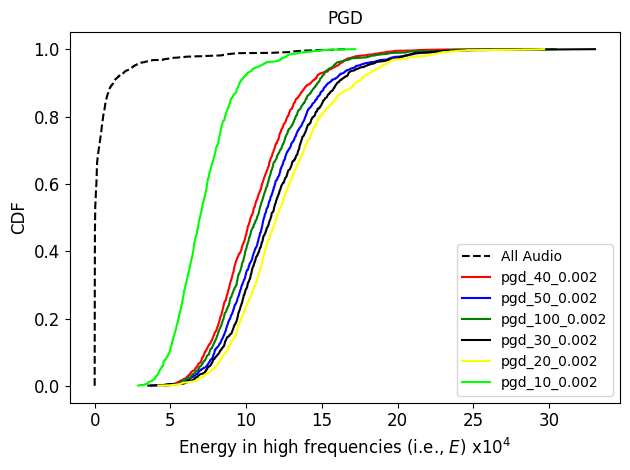

In [ ]:
# PGD
pgd_files = os.listdir("pgd")
pgd_data = {}
for x in pgd_files:
  with open(f"pgd/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    pgd_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(combined_data, pgd_data, "PGD")

Size = 2100, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00005960, STD =  0.00018325, D =  0.00060935
Size = 918, Max = 0.0016839917516335845, Min = 0.0, Mean =  0.00010457, STD =  0.00026467, D =  0.00089859


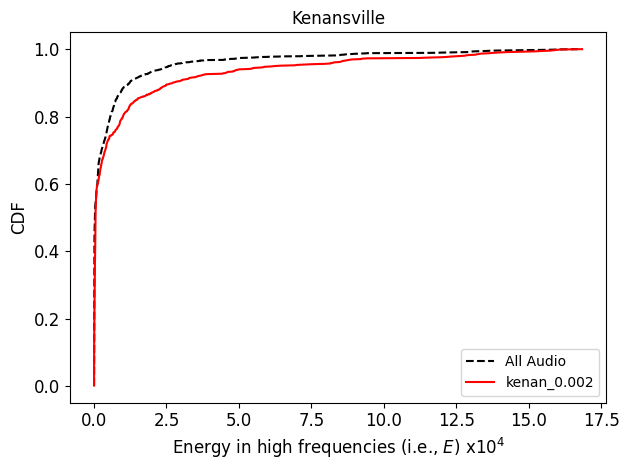

In [ ]:
# Kenan
kenan_files = os.listdir("kenan")
kenan_data = {}
for x in kenan_files:
  with open(f"kenan/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    kenan_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(combined_data, kenan_data, "Kenansville")

Size = 2100, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00005960, STD =  0.00018325, D =  0.00060935
Size = 1000, Max = 0.06269855052232742, Min = 0.0, Mean =  0.00261042, STD =  0.00609749, D =  0.02090288
Size = 1000, Max = 0.018184298649430275, Min = 0.00027122124447487295, Mean =  0.00335541, STD =  0.00192933, D =  0.00914340
Size = 1000, Max = 0.0018412551144137979, Min = 0.0, Mean =  0.00088698, STD =  0.00032820, D =  0.00187159
Size = 1000, Max = 0.002363163512200117, Min = 0.0, Mean =  0.00090013, STD =  0.00034387, D =  0.00193173
Size = 1000, Max = 0.0017175241373479366, Min = 0.0, Mean =  0.00084604, STD =  0.00029913, D =  0.00174342
Size = 1000, Max = 0.003615753259509802, Min = 0.00031752767972648144, Mean =  0.00151536, STD =  0.00057273, D =  0.00323355
Size = 1000, Max = 0.044614892452955246, Min = 0.0, Mean =  0.00149515, STD =  0.00340297, D =  0.01170405
Size = 1000, Max = 0.0032353403512388468, Min = 0.0004586266295518726, Mean =  0.00158539, STD =  0.0004

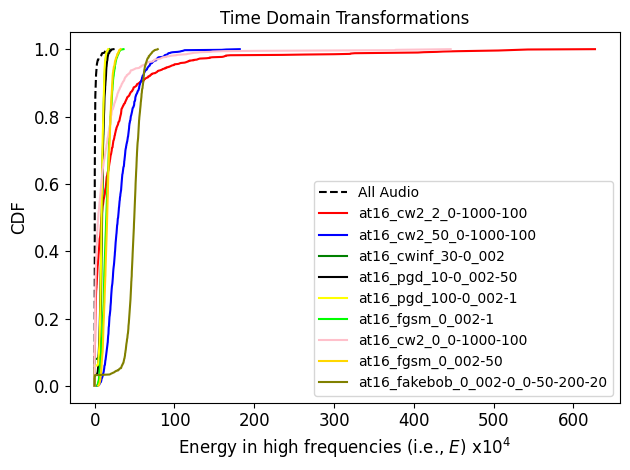

Size = 2100, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00005960, STD =  0.00018325, D =  0.00060935
Size = 1000, Max = 0.00965033657848835, Min = 0.0, Mean =  0.00525996, STD =  0.00151103, D =  0.00979305
Size = 1000, Max = 0.0003146062372252345, Min = 0.0, Mean =  0.00002858, STD =  0.00003996, D =  0.00014845
Size = 1000, Max = 0.006657767575234175, Min = 0.001054922235198319, Mean =  0.00400002, STD =  0.00092764, D =  0.00678295
Size = 1000, Max = 0.003876763628795743, Min = 0.0005571360816247761, Mean =  0.00134740, STD =  0.00034631, D =  0.00238634
Size = 1000, Max = 0.0066514890640974045, Min = 0.0012000387068837881, Mean =  0.00327913, STD =  0.00088199, D =  0.00592509
Size = 1000, Max = 0.007184408605098724, Min = 0.0011557061225175858, Mean =  0.00316667, STD =  0.00092976, D =  0.00595596


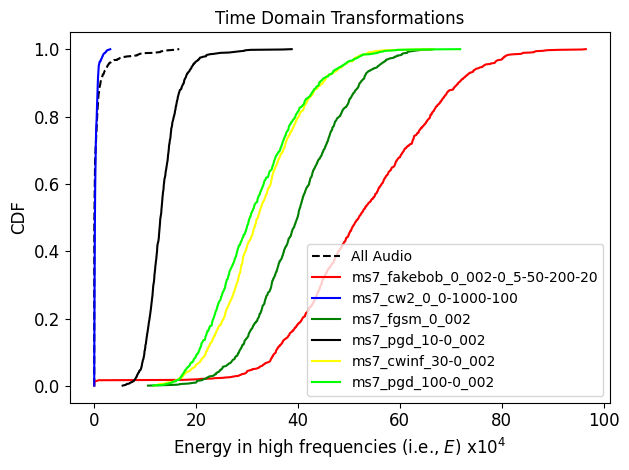

Size = 2100, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00005960, STD =  0.00018325, D =  0.00060935
Size = 1000, Max = 0.00037548653199337423, Min = 0.0, Mean =  0.00002979, STD =  0.00004613, D =  0.00016819
Size = 1000, Max = 0.005347067024558783, Min = 0.00013279315317049623, Mean =  0.00163872, STD =  0.00120335, D =  0.00524877
Size = 1000, Max = 0.00036767410347238183, Min = 0.0, Mean =  0.00003186, STD =  0.00004632, D =  0.00017081
Size = 1000, Max = 0.009949488565325737, Min = 0.0, Mean =  0.00433920, STD =  0.00121768, D =  0.00799225


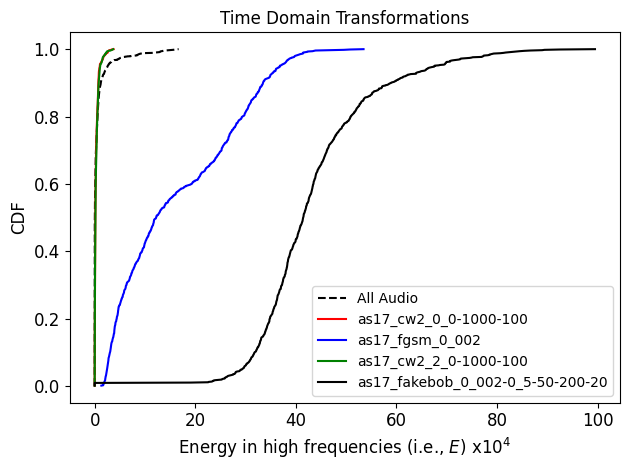

Size = 2100, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00005960, STD =  0.00018325, D =  0.00060935
Size = 1000, Max = 0.009090611711144447, Min = 0.0, Mean =  0.00437576, STD =  0.00169145, D =  0.00945010
Size = 1000, Max = 0.0021277377381920815, Min = 0.00027023738948628306, Mean =  0.00099219, STD =  0.00031275, D =  0.00193043
Size = 1000, Max = 0.004370472393929958, Min = 0.0002455275389365852, Mean =  0.00186264, STD =  0.00069977, D =  0.00396196
Size = 1000, Max = 0.010190831497311592, Min = 7.919874889239509e-08, Mean =  0.00034480, STD =  0.00064616, D =  0.00228328
Size = 1000, Max = 0.007888201624155045, Min = 7.919874889239509e-08, Mean =  0.00024508, STD =  0.00051369, D =  0.00178615
Size = 1000, Max = 0.012728344649076462, Min = 0.00010436121374368668, Mean =  0.00278928, STD =  0.00160857, D =  0.00761501
Size = 1000, Max = 0.002748982748016715, Min = 0.0004052034637425095, Mean =  0.00170029, STD =  0.00037967, D =  0.00283930
Size = 1000, Max = 0.00249514449

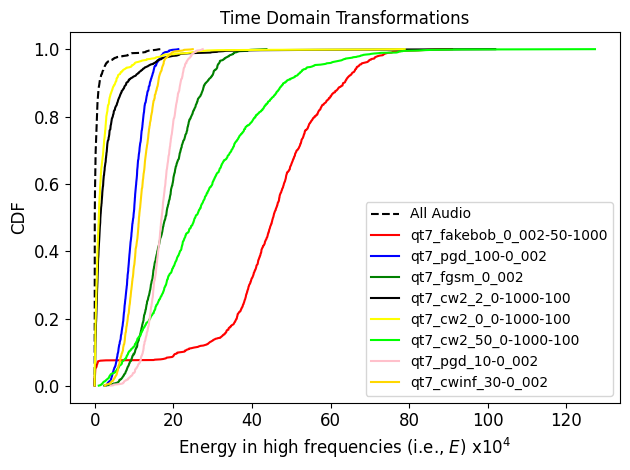

In [23]:
# Defense - Time Domain
time_d_files = os.listdir("time")
try:
  time_d_files.remove(".ipynb_checkpoints")
except:
  pass
for f in time_d_files:
  files = os.listdir(f"time/{f}")
  time_d_data = {}
  for x in files:
    with open(f"time/{f}/{x}", "br") as f1:
      temp = pickle.load(f1)
      temp.sort()
      time_d_data[x.split(".pickle")[0]] = temp
  plot_cdf_adversarial_audio(combined_data, time_d_data, "Time Domain Transformations")